# 1. Data_Preparation_for_AR_Attribution-Relations


This notebook is developed by Betty, Fina and Xixi for NLP Tutorial, June 2021.

The code is adopted from the owner of the following Youtube Channel: https://www.youtube.com/channel/UChO9ZxMm1tCBqk8mrxPq-nA

His code on Named Entity Recognition task is available in the Drive link below: https://drive.google.com/file/d/1AtdszLNBf06ZJCJsz090N8htFZwdpBAx/view

Requirements: 
* Tensor flow 2.5

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
%matplotlib inline

## Load and prepare data

Thanks to Roser Morante for providing the preprocessed PolNeAR and PARC 3.0 corpora inCONLL format for this task.

PARC Corpus

Silvia Pareti. Parc3.0: A corpus of attribution relations. International Conference on Language Resources and Evaluation 2016 (LREC 2016). https://www.aclweb.org/anthology/L16-1619/ (Links to an external site.)

Attention: It not allowed to redistribute the PARC corpus or to use it for other purposes than building an attribution system for this course. The reason is that the text is subject to having an LDC license.

PolNeAR Corpus

An attribution relations corpus for political news, Edward Newell, Drew Margolin, Derek Ruths, International Conference on Language Resources and Evaluation 2018 (LREC 2018). https://www.aclweb.org/anthology/L18-1524/ (Links to an external site.)

https://github.com/networkdynamics/PolNeAR

## 1. Prepare PolNeAR data:

In [3]:
#Read files in the training data folder
# polnear_train = os.listdir('../polnear-conll/train-conll-foreval/')
polnear_train = os.listdir('../polnear-conll/dev-conll-foreval/')
#polnear_train = os.listdir('../polnear-conll/test-conll-foreval/')
print(len(polnear_train))

# create an empty list to dump the data
polnear_train_data = []
#iterate over the data files
for file in polnear_train:
    # data is not located in the same folder, thus define the file path.
#     filepath = f'../polnear-conll/train-conll-foreval/{file}'
    filepath = f'../polnear-conll/dev-conll-foreval/{file}'
    #filepath = f'../polnear-conll/test-conll-foreval/{file}'
    # open the files
    with open(filepath, "r", encoding="latin1") as data_handle:
        # read the lines
        text = data_handle.readlines()
        for line in text:
            # add the line to polnear_train_data list
            polnear_train_data.append(line)
    
print("Reading the dataset.....")

print(text[0])
print(type(text))
print(len(text))

print(polnear_train_data[0])
print(type(polnear_train_data))
print(len(polnear_train_data))

84
Reading the dataset.....
west-journal_2016-10-05_pence-gives-gop-a-boost-with-sol.txt.xml	1	1	1	0,5	Pence	Pence	NNP	nsubj	2	_ _ _ _ _ _ _ _ _ _ _ _ _ _

<class 'list'>
514
west-journal_2016-09-29_gold-star-mom-corners-obama-on-h.txt.xml	1	1	1	0,4	Gold	Gold	NNP	compound	5	_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

<class 'list'>
81572


In [4]:
text = []
for item in polnear_train_data:
    text.append(item.split("\t"))
    
print(text[1])

['west-journal_2016-09-29_gold-star-mom-corners-obama-on-h.txt.xml', '1', '2', '2', '5,9', 'Star', 'Star', 'NNP', 'compound', '5', '_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _\n']


In [5]:
#create the data frame
df_polnear = pd.DataFrame(text, columns=["Article_Name", "Sentence_nr", "Number2", "Number3", "Number4", "Word", "Lemma", "POS", "Dep_rel", "Number5", "AR_label"])
#drop the lines which won't be used.
df_polnear.drop(["Number2", "Number3", "Number4", "Lemma", "POS", "Dep_rel", "Number5"], axis=1, inplace=True)
# fill NaN values
df_polnear.fillna(0)
#a_dataframe["AB"] = a_dataframe["A"] + a_dataframe["B"]
#df_polnear["look_up_key"]=df_polnear["Article_Name"]+df_polnear["Sentence_nr"].astype(str)
#df_polnear["look_up_key"]=df_polnear[['Article_Name', 'Sentence_nr']].agg('-'.join, axis=1)
#delete the lists in order to prevent confusions in the notebook.

del text, polnear_train_data

In [6]:
#df_polnear.head(1)["look_up_key"]
#str(df_polnear.head(1)["look_up_key"])[-1]

In [7]:
def clean_labels(label):
    '''take label as string input, remove digits and punctuation, return clean string'''
    label = str(label)
    new_label=''.join(e for e in label if e.isalnum() and not e.isdigit())
    
    return new_label    

In [8]:
#test the function:

test_string = "I-CONTENT-1 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ..."

clean_labels(test_string)

'ICONTENT'

In [9]:
#apply it on the df:
df_polnear['AR_label'] = df_polnear['AR_label'].apply(clean_labels)

In [10]:
#check the df:
df_polnear.head(50)

,Article_Name,Sentence_nr,Word,AR_label
0,west-journal_2016-09-29_gold-star-mom-corners-...,1,Gold,
1,west-journal_2016-09-29_gold-star-mom-corners-...,1,Star,
2,west-journal_2016-09-29_gold-star-mom-corners-...,1,Mom,
3,west-journal_2016-09-29_gold-star-mom-corners-...,1,Corners,
4,west-journal_2016-09-29_gold-star-mom-corners-...,1,Obama,
5,west-journal_2016-09-29_gold-star-mom-corners-...,1,On,
6,west-journal_2016-09-29_gold-star-mom-corners-...,1,His,BSOURCE
7,west-journal_2016-09-29_gold-star-mom-corners-...,1,Refusal,BCUE
8,west-journal_2016-09-29_gold-star-mom-corners-...,1,To,BCONTENT
9,west-journal_2016-09-29_gold-star-mom-corners-...,1,Use,ICONTENT


In [11]:
#map the classes with or without BIO tags.
classes_map = {
    "None": "O",
    "": "O",
    "BCUE":  "B-CUE",#"CUE",
    "ICUE":  "I-CUE",#,"CUE",
    "BCONTENT": "B-CONTENT",#,"CONTENT", 
    "ICONTENT": "I-CONTENT",#"CONTENT", ,
    "BSOURCE": "B-SOURCE",#"SOURCE", ,
    "ISOURCE": "I-SOURCE"#"SOURCE", ,
}

df_polnear['AR_label'] = df_polnear['AR_label'].map(classes_map)


In [12]:
df_polnear.head(50)

,Article_Name,Sentence_nr,Word,AR_label
0,west-journal_2016-09-29_gold-star-mom-corners-...,1,Gold,O
1,west-journal_2016-09-29_gold-star-mom-corners-...,1,Star,O
2,west-journal_2016-09-29_gold-star-mom-corners-...,1,Mom,O
3,west-journal_2016-09-29_gold-star-mom-corners-...,1,Corners,O
4,west-journal_2016-09-29_gold-star-mom-corners-...,1,Obama,O
5,west-journal_2016-09-29_gold-star-mom-corners-...,1,On,O
6,west-journal_2016-09-29_gold-star-mom-corners-...,1,His,B-SOURCE
7,west-journal_2016-09-29_gold-star-mom-corners-...,1,Refusal,B-CUE
8,west-journal_2016-09-29_gold-star-mom-corners-...,1,To,B-CONTENT
9,west-journal_2016-09-29_gold-star-mom-corners-...,1,Use,I-CONTENT


### Plot a histogram of classes

<AxesSubplot:>

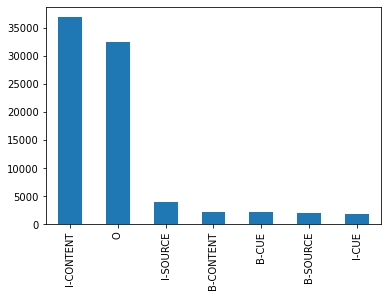

In [13]:
bins_polnear = df_polnear["AR_label"].value_counts()
total_polnear = df_polnear["AR_label"].count()
bins_polnear = bins_polnear.apply(lambda x: float(x)/total_polnear)

# Histogram of the classes
df_polnear["AR_label"].value_counts().plot(kind="bar")

<AxesSubplot:>

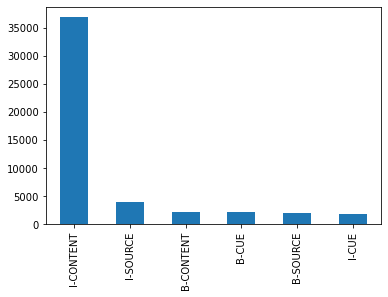

In [14]:
#check the distribution without "O":
df_polnear["AR_label"].value_counts().drop("O", axis=0).plot(kind='bar')

In [15]:
#write the df to a tsv file. Adjust the file path depending of BIO preference.

#polnear_outfile_path = 'Preprocessed_data/polnear_preprocessed_BIO_train.csv' #previously by Fina, '.....tsv'
polnear_outfile_path = 'Preprocessed_data/polnear_preprocessed_BIO_dev.csv'
#polnear_outfile_path = 'Preprocessed_data/polnear_preprocessed_BIO_test.csv'

df_polnear.to_csv(polnear_outfile_path, sep = ',') # previously by Fina, sep = '\t'

## 2. Prepare PARC3 data:

Implement the same processes performed on PolNeAr corpus.

In [16]:
#Read files in the training data folder
# parc3_train = os.listdir('../parc30-conll/train-conll-foreval/')
parc3_train = os.listdir('../parc30-conll/dev-conll-foreval/')
#parc3_train = os.listdir('../parc30-conll/test-conll-foreval/')
print(len(parc3_train))

# create an empty list to dump the data
parc3_train_data = []
#iterate over the data files
for file in parc3_train:
    # data is not located in the same folder, thus define the file path.
#     filepath = f'../parc30-conll/train-conll-foreval/{file}'
    filepath = f'../parc30-conll/dev-conll-foreval/{file}'
    #filepath = f'../parc30-conll/test-conll-foreval/{file}'
    # open the files
    with open(filepath, "r", encoding="latin1") as data_handle:
        # read the lines
        text_parc = data_handle.readlines()
        for line in text_parc:
            # add the line to parc3_train_data list
            parc3_train_data.append(line)
    
print("Reading the dataset.....")

print(text_parc[0])
print(type(text_parc))
print(len(text_parc))

print(parc3_train_data[0])
print(type(parc3_train_data))
print(len(parc3_train_data))

55
Reading the dataset.....
wsj_2403.xml	1	1	1	9,17	Axa-Midi	Axa-Midi	NNP	compound	2	_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

<class 'list'>
644
wsj_2410.xml	1	1	1	9,12	The	the	DT	det	4	B-CONTENT-AT-1 _ _

<class 'list'>
34143


In [17]:
text_parc_split = []
for item in parc3_train_data:
    text_parc_split.append(item.split("\t"))
    
print(text_parc_split[1])

['wsj_2410.xml', '1', '2', '2', '13,31', 'inflation-adjusted', 'inflation-adjusted', 'JJ', 'amod', '4', 'I-CONTENT-AT-1 _ _\n']


In [18]:
#create the data frame
df_parc3 = pd.DataFrame(text_parc_split, columns=["Article_Name", "Sentence_nr", "Number2", "Number3", "Number4", "Word", "Lemma", "POS", "Dep_rel", "Number5", "AR_label"])
#drop the lines which won't be used.
df_parc3.drop(["Number2", "Number3", "Number4", "Lemma", "POS", "Dep_rel", "Number5",], axis=1, inplace=True)
#delete the lists in order to prevent confusions in the notebook.
del text_parc_split, parc3_train_data

In [19]:
df_parc3.head(210)

,Article_Name,Sentence_nr,Word,AR_label
0,wsj_2410.xml,1,The,B-CONTENT-AT-1 _ _\n
1,wsj_2410.xml,1,inflation-adjusted,I-CONTENT-AT-1 _ _\n
2,wsj_2410.xml,1,growth,I-CONTENT-AT-1 _ _\n
3,wsj_2410.xml,1,rate,I-CONTENT-AT-1 _ _\n
4,wsj_2410.xml,1,for,I-CONTENT-AT-1 _ _\n
...,...,...,...,...
205,wsj_2425.xml,3,",",_ _ _ _ _ _\n
206,wsj_2425.xml,3,'',_ _ _ _ _ _\n
207,wsj_2425.xml,3,although,_ _ _ _ _ _\n
208,wsj_2425.xml,3,the,_ _ _ _ _ _\n


In [20]:
def clean_Parc3_labels(label):
    '''take the label and remove the unwanted characters, return the cleaned version'''
    
    chars_2_remove = ['_','\n','0','1','2','3','4','5','6','7','8','9','']
    clean_char = []
    for char in label:
        if char not in chars_2_remove:
            clean_char.append(char)
            
    clean_label = "".join(clean_char)
    final_label = clean_label.strip()

    return final_label
    

In [21]:
#test the function:
testtt = clean_Parc3_labels("_ I-CONTENT-PD-1 _ _ I-CONTENT-NE-7 _ _ _ _ ")

print(testtt)

I-CONTENT-PD-   I-CONTENT-NE-


In [22]:
#make sure the AR_label data is "string".
df_parc3['AR_label'] = df_parc3['AR_label'].apply(str)

In [23]:
#apply the function on df:
df_parc3['AR_label']=df_parc3['AR_label'].apply(clean_Parc3_labels)

In [24]:
#che the output:
df_parc3.head(210)

,Article_Name,Sentence_nr,Word,AR_label
0,wsj_2410.xml,1,The,B-CONTENT-AT-
1,wsj_2410.xml,1,inflation-adjusted,I-CONTENT-AT-
2,wsj_2410.xml,1,growth,I-CONTENT-AT-
3,wsj_2410.xml,1,rate,I-CONTENT-AT-
4,wsj_2410.xml,1,for,I-CONTENT-AT-
...,...,...,...,...
205,wsj_2425.xml,3,",",
206,wsj_2425.xml,3,'',
207,wsj_2425.xml,3,although,
208,wsj_2425.xml,3,the,


In [25]:
def extra_clean(label):
    
    '''Get the first part of the label. Remove nested AR labels, number, other codes ect.'''
    
    v= label.split('-')
    
    k = v[:2]

    m = '-'.join(k)
    
    n = m.strip()
        
    return n

In [26]:
#test the function:

test_list = "I-CONTENT-PD-1 I-CONTENT-NE-7 \n"

t = extra_clean(test_list)

print(t)

I-CONTENT


In [27]:
#apply it on the df:

df_parc3['AR_label']=df_parc3['AR_label'].apply(extra_clean)

In [28]:
df_parc3.head(210)

,Article_Name,Sentence_nr,Word,AR_label
0,wsj_2410.xml,1,The,B-CONTENT
1,wsj_2410.xml,1,inflation-adjusted,I-CONTENT
2,wsj_2410.xml,1,growth,I-CONTENT
3,wsj_2410.xml,1,rate,I-CONTENT
4,wsj_2410.xml,1,for,I-CONTENT
...,...,...,...,...
205,wsj_2425.xml,3,",",
206,wsj_2425.xml,3,'',
207,wsj_2425.xml,3,although,
208,wsj_2425.xml,3,the,


In [29]:
#check the labels.

AR_labels_PARC = set(df_parc3['AR_label'].values.tolist())

print(len(AR_labels_PARC))


8


In [30]:
#look at their forms:
print(AR_labels_PARC)

{'', 'B-CUE', 'None', 'I-CUE', 'I-SOURCE', 'I-CONTENT', 'B-SOURCE', 'B-CONTENT'}


In [31]:
#map the classes with or without BIO tags.

classes_map2 = {
    "None": "O",
    "": "O",
    "B-CUE": "B-CUE",#"CUE", #,
    "I-CUE": "I-CUE",#"CUE", #,
    "B-CONTENT": "B-CONTENT",#"CONTENT", #,
    "I-CONTENT": "I-CONTENT",#"CONTENT", #,
    "B-SOURCE": "B-SOURCE",#"SOURCE", #,
    "I-SOURCE": "I-SOURCE"#"SOURCE", #,
}

In [32]:
df_parc3['AR_label'] = df_parc3['AR_label'].map(classes_map2)

In [33]:
df_parc3.head(30)

,Article_Name,Sentence_nr,Word,AR_label
0,wsj_2410.xml,1,The,B-CONTENT
1,wsj_2410.xml,1,inflation-adjusted,I-CONTENT
2,wsj_2410.xml,1,growth,I-CONTENT
3,wsj_2410.xml,1,rate,I-CONTENT
4,wsj_2410.xml,1,for,I-CONTENT
5,wsj_2410.xml,1,France,I-CONTENT
6,wsj_2410.xml,1,'s,I-CONTENT
7,wsj_2410.xml,1,gross,I-CONTENT
8,wsj_2410.xml,1,domestic,I-CONTENT
9,wsj_2410.xml,1,product,I-CONTENT


In [34]:
AR_labels_PARC = set(df_parc3['AR_label'].values.tolist())

print(AR_labels_PARC)


{'B-CUE', 'O', 'I-CUE', 'I-SOURCE', 'I-CONTENT', 'B-SOURCE', 'B-CONTENT'}


<AxesSubplot:>

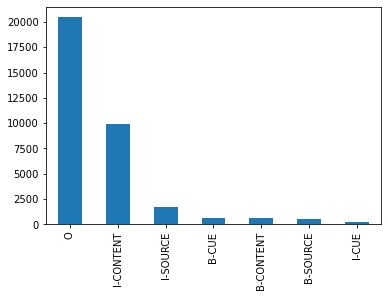

In [35]:
# Histogram of the classes

bins_parc3 = df_parc3["AR_label"].value_counts()
total_parc3 = df_parc3["AR_label"].count()
bins_parc3 = bins_parc3.apply(lambda x: float(x)/total_parc3)

df_parc3["AR_label"].value_counts().plot(kind="bar")

In [36]:
#write the df to a tsv file. Adjust the file path depending of BIO preference.

#parc_outfile_path = 'Preprocessed_data/parc3_preprocessed_BIO_train.csv'
parc_outfile_path = 'Preprocessed_data/parc3_preprocessed_BIO_dev.csv'
#parc_outfile_path = 'Preprocessed_data/parc3_preprocessed_BIO_test.csv'

df_parc3.to_csv(parc_outfile_path, sep = ',')

### Merge PolNeAr and Parc3 data frames: 

In [37]:
# append the df_parc3 to df_polnear

df_merges = df_polnear.append(df_parc3, ignore_index=True)

In [38]:
df_merges = df_merges.replace(np.nan, '')

In [39]:
#check their lenght:
print(len(df_polnear.index))
print(len(df_parc3.index))
print(len(df_merges.index))

81572
34143
115715


In [40]:
df_merges.head(50)

,Article_Name,Sentence_nr,Word,AR_label
0,west-journal_2016-09-29_gold-star-mom-corners-...,1,Gold,O
1,west-journal_2016-09-29_gold-star-mom-corners-...,1,Star,O
2,west-journal_2016-09-29_gold-star-mom-corners-...,1,Mom,O
3,west-journal_2016-09-29_gold-star-mom-corners-...,1,Corners,O
4,west-journal_2016-09-29_gold-star-mom-corners-...,1,Obama,O
5,west-journal_2016-09-29_gold-star-mom-corners-...,1,On,O
6,west-journal_2016-09-29_gold-star-mom-corners-...,1,His,B-SOURCE
7,west-journal_2016-09-29_gold-star-mom-corners-...,1,Refusal,B-CUE
8,west-journal_2016-09-29_gold-star-mom-corners-...,1,To,B-CONTENT
9,west-journal_2016-09-29_gold-star-mom-corners-...,1,Use,I-CONTENT


In [41]:
#check the labels.

AR_labels_merged = set(df_merges['AR_label'].values.tolist())

print(len(AR_labels_merged))
print(AR_labels_merged)

for l in AR_labels_merged:
    print(l)
    print(type(l))

7
{'B-CUE', 'O', 'I-CUE', 'I-CONTENT', 'I-SOURCE', 'B-SOURCE', 'B-CONTENT'}
B-CUE
<class 'str'>
O
<class 'str'>
I-CUE
<class 'str'>
I-CONTENT
<class 'str'>
I-SOURCE
<class 'str'>
B-SOURCE
<class 'str'>
B-CONTENT
<class 'str'>


In [42]:
#map the classes with or without BIO tags.

#classes_map3 = {
#    0 : "O",
#    "": "O",
#    "O" : "O",
 #   "CUE": "CUE", #"B-CUE",
#    "CUE": "CUE", #"I-CUE",
#    "CONTENT": "CONTENT", #"B-CONTENT",
 #   "CONTENT": "CONTENT", #"I-CONTENT",
 #   "SOURCE": "SOURCE", #"B-SOURCE",
 #   "SOURCE": "SOURCE", #"I-SOURCE",
#}

In [43]:
#df_merges['AR_label'] = df_merges['AR_label'].map(classes_map3)

In [44]:
df_merges.head(50)

,Article_Name,Sentence_nr,Word,AR_label
0,west-journal_2016-09-29_gold-star-mom-corners-...,1,Gold,O
1,west-journal_2016-09-29_gold-star-mom-corners-...,1,Star,O
2,west-journal_2016-09-29_gold-star-mom-corners-...,1,Mom,O
3,west-journal_2016-09-29_gold-star-mom-corners-...,1,Corners,O
4,west-journal_2016-09-29_gold-star-mom-corners-...,1,Obama,O
5,west-journal_2016-09-29_gold-star-mom-corners-...,1,On,O
6,west-journal_2016-09-29_gold-star-mom-corners-...,1,His,B-SOURCE
7,west-journal_2016-09-29_gold-star-mom-corners-...,1,Refusal,B-CUE
8,west-journal_2016-09-29_gold-star-mom-corners-...,1,To,B-CONTENT
9,west-journal_2016-09-29_gold-star-mom-corners-...,1,Use,I-CONTENT


In [45]:
AR_labels_merged = set(df_merges['AR_label'].values.tolist())

print(len(AR_labels_merged))
print(AR_labels_merged)

for l in AR_labels_merged:
    print(l)
    print(type(l))

7
{'B-CUE', 'O', 'I-CUE', 'I-CONTENT', 'I-SOURCE', 'B-SOURCE', 'B-CONTENT'}
B-CUE
<class 'str'>
O
<class 'str'>
I-CUE
<class 'str'>
I-CONTENT
<class 'str'>
I-SOURCE
<class 'str'>
B-SOURCE
<class 'str'>
B-CONTENT
<class 'str'>


<AxesSubplot:>

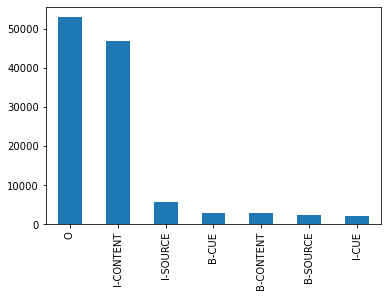

In [46]:
# Histogram of the classes

bins_merges = df_merges["AR_label"].value_counts()
total_merges = df_merges["AR_label"].count()
bins_merges = bins_merges.apply(lambda x: float(x)/total_merges)

df_merges["AR_label"].value_counts().plot(kind="bar")

In [47]:
print(len(df_merges.index))

115715


In [48]:
#write the df to a csv file. Adjust the file path depending of BIO preference.

#merged_outfile_path = 'Preprocessed_data/merged-parc3-polnear_preprocessed_BIO_train.csv'
merged_outfile_path = 'Preprocessed_data/merged-parc3-polnear_preprocessed_BIO_dev.csv'
#merged_outfile_path = 'Preprocessed_data/merged-parc3-polnear_preprocessed_BIO_test.tsv'

df_merges.to_csv(merged_outfile_path, sep = ',')

The model will be trained on another notebook.

Please see Model_Building_for_AR_Attribution-Relations.ipynb